<a href="https://colab.research.google.com/github/mm002a/JupyterNotebooks-V0.0/blob/main/DeclineCurves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pytexit

In [2]:
from pytexit import py2tex

In [3]:
py2tex('Tot_prod = (1-pow(1+b*d_init*T,(b/(1-b))))*q_init/(d_init*(1-b))')

<IPython.core.display.Latex object>

$$Tot_{prod}=\frac{\left(1-\left(1+b d_{init} T\right)^{\frac{b}{1-b}}\right) q_{init}}{d_{init} \left(1-b\right)}$$


'$$Tot_{prod}=\\frac{\\left(1-\\left(1+b d_{init} T\\right)^{\\frac{b}{1-b}}\\right) q_{init}}{d_{init} \\left(1-b\\right)}$$'

#Production decline curves

## Introduction
Over the life of an oil and gas well the production decreases as the well depressurises. Arps[^1] (1945) suggests the following empirical formula:
\begin{align}
\frac{1}{q}\frac{dq}{dt} = -b q^d 
~~~~~~~~~~~~~~\text{ where: }b>0 \text{ and } 0\leq d \leq 1
\end{align}
where $q(t)$ is the flow rate and $b$ and $d$ are model constants.

| Param | Name | $q(t)$ | $N$| H5 |
|----|----|:--------------------------:|:-------------------:|----|
| V1 | V2 | V3 | V4 | V5|
| d=0   | Exponential | $q_0\exp^{-bt}$ | V4 | V5|
| 0<d<1 | Hyperbolic  | $\frac{q_0}{(1+bDt)^{\frac{1}{b}}}$| V4 | V5|
| 0<d<1 | Hyperbolic  | $q_0(1+bDt)^{-\frac{1}{b}}$| V4 | V5|
| d=1   | Harmonic    | V3 | V4 | V5|
| d=1   | Harmonic    |  lllllllllllllllllmmmmmmm  | V4 | V5|



fdg


## Model identification
`Assume we never find UcomS.exe`  
Sort out the table above.
Define a function $\cal{F}(q)$ by:
\begin{align}
\cal{F}(q) := \frac{1}{q}\frac{dq}{dt}(q)
\end{align}
Obviously the differential equation above says that:
\begin{align}
\cal{F}(q) = -b q^d 
\begin{cases}
d = 0 & \implies \cal{F}(q) \text{ is constant} \\
0<d<1 & \implies \cal{F}(q) \text{ is less than the $d=1$ case, see graph } \\
d = 1 & \implies \cal{F}(q) \text{ is linear (in $q$)} \\
\end{cases}
\end{align}

Procedure:  
1.  Possibly use a reduced interval (throw away start-up effects).
1.  Use a moving average to eliminate noise.
1.  Analyse $\cal{F}(q)$ over a suitable interval.

###References
1.   J.J. Arps, **Analysis of Decline Curves** *Trans. 160 (01): Pp 228–247. Paper Number: SPE-945228-G* (1945)
https://doi.org/10.2118/945228-G
2.   J.J. Arps, **Estimation of Primary Oil Reserves**, * Trans AIME, 207(01) Pp 182-191* (1956)
https://doi.org/10.2118/627-G
3. Guo,Boyun; Lyons, Willam C.; and Ghalambor, Ali; 
**Petroleum Production Engineering --- A Computer-Assisted Approach**' 
Elsevier, 2007
4. Gregory King, **4.4.1.4: Pseudo Steady-State Flow of Oil to a Vertical Production well**
URL https://www.e-education.psu.edu/png301/node/854)

Do the graph


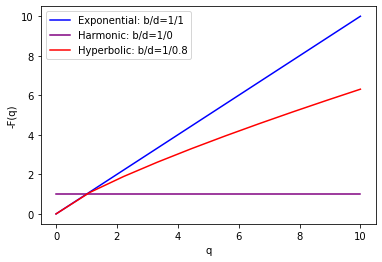

Agreeing with Guo et al. Fig 8.4


In [13]:
print("Do the graph")
import numpy as np
import matplotlib.pyplot as plt
b = 1
d = 1
q = np.linspace(0,10,10)
F = b*pow(q,d)
plt.plot(q,F,color='blue',label="Exponential: b/d=1/1")
d = 0
F = b*pow(q,d)
plt.plot(q,F,color='purple',label="Harmonic: b/d=1/0")
d = 0.8
F = b*pow(q,d)
plt.plot(q,F,color='red',label="Hyperbolic: b/d=1/0.8")
plt.xlabel('q')
plt.ylabel('-F(q)')
plt.legend()
plt.show()
print("Agreeing with Guo et al. Fig 8.4")
#


In [4]:
#Exponential decline
import math
def Tot_prod_exp (q_init=1,d_init=0.1,b=0,T=10):
  """
  Compute the total production for a well with an exponential decline curve
  Tot_prod_exp (q_init=1,d_init=0.1,b=0,T=10)
  q_init: the initial production, d_init: the initial decline rate, 
  b: dummy variable, T: the time period
  """
  print("Exponential decline:")
  Tot_prod = -q_init*(1-pow((1-d_init),T))/math.log(1-d_init)
  print("q_init: ",q_init,"d_init: ",d_init," b: ",b," Time: ",T)
  return Tot_prod
def Tot_prod_hyper (q_init=1,d_init=0.1,b=0.5,T=10):
  """
  Compute the total production for a well with a hyperbolic decline curve
  Tot_prod_exp (q_init=1,d_init=0.1,b=0.5,T=10)
  q_init: the initial production, d_init: the initial decline rate, 
  b: model parameter (0->exponential, 1->harmonic), T: the time period
  """
  print("Hyperbolic decline:")
  print("1+bd")
  Tot_prod = (1-pow(1+b*d_init*T,(b/(1-b))))*q_init/(d_init*(1-b))
  print("q_init: ",q_init,"d_init: ",d_init," b: ",b," T: ",T)
  return Tot_prod
print("Test of log10: ",math.log10(10)," e: ",math.e," ln: ",math.log(math.e))
print("Tot Prod(exponential decline): ",Tot_prod_exp(T=12))
print("Tot Prod(hyperbolic decline): ",Tot_prod_hyper(T=12))

Test of log10:  1.0  e:  2.718281828459045  ln:  1.0
Exponential decline:
q_init:  1 d_init:  0.1  b:  0  Time:  12
Tot Prod(exponential decline):  6.810620269261164
Hyperbolic decline:
1+bd
q_init:  1 d_init:  0.1  b:  0.5  T:  12
Tot Prod(hyperbolic decline):  -12.000000000000002


q:  [904.84, 818.73, 740.82, 670.32, 606.53, 548.81, 496.59, 449.33, 406.57, 367.88, 332.87, 301.19, 272.53, 246.6, 223.13, 201.9, 182.68, 165.3, 149.57, 135.34, 122.46, 110.8, 100.26, 90.72]


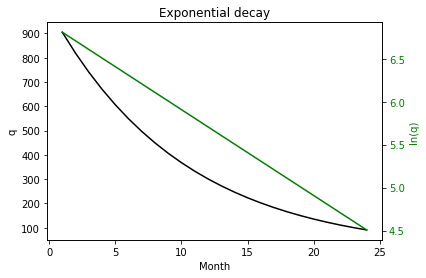

In [5]:
import numpy as np
import matplotlib.pyplot as plt
#Chapter 8 Buoyun Guo et al
#Exponential decay Table 8-1 from https://faculty.ksu.edu.sa/sites/default/files/Production Decline Analysis.pdf
q = [904.84, 818.73, 740.82, 670.32, 606.53, 548.81, 496.59, 449.33, 406.57, 367.88, 332.87, 301.19, 272.53, 246.60, 223.13,
     201.90, 182.68, 165.30, 149.57, 135.34, 122.46, 110.80, 100.26, 90.72]
print("q: ",q)
x = list(range(1,25))
#https://pythonguides.com/matplotlib-two-y-axes/
fig, ax1 = plt.subplots() 

ax1.set_title('Exponential decay')  
ax1.set_xlabel('Month') 
ax1.set_ylabel('q', color = 'black') 
plot_1 = ax1.plot(x, q, color = 'black') 
ax1.tick_params(axis ='y', labelcolor = 'black') 

# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('ln(q)', color = 'green') 
plot_2 = ax2.plot(x, np.log(q), color = 'green') 
ax2.tick_params(axis ='y', labelcolor = 'green') 

# Show plot

plt.show()
#


Exponent d:  1.5  xt:  [0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9
 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7
 3.8]
Dq:  [0.00117848 0.00124145 0.00126142 0.00127138 0.00126955 0.00131117
 0.00135031 0.0013202  0.00141314 0.00136395 0.00145506 0.00138215
 0.00146838 0.00146468 0.00145095 0.00153592 0.00151174 0.00159773
 0.00156067 0.00150906 0.00158636 0.00166932 0.00159862 0.00167767
 0.00158607 0.00184367 0.0015523  0.00182064 0.00169745 0.00177239
 0.00162053 0.00192589 0.00176353 0.00183635 0.0016401  0.00198319
 0.00177355]
Exponent d:  1.45  xt:  [0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9
 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7
 3.8]
Dq:  [0.00131742 0.00138546 0.00140535 0.00141413 0.00140988 0.00145392
 0.00149511 0.00145964 0.00156028 0.00150387 0.00160224 0.00151994
 0.00161281 0.00160675 0.0015898  0.00168099 0.0016526  0.00174466
 0.00170227 0.00164422 

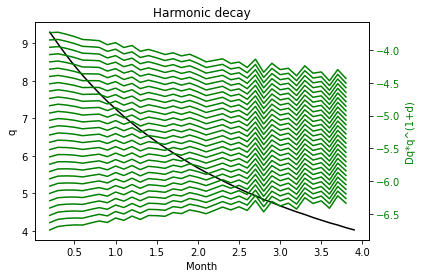

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from array import array
#Harmonic decay Table 8-2 from https://faculty.ksu.edu.sa/sites/default/files/Production Decline Analysis.pdf
#Just typing data!q = [9.29, 0.30, 8.98, 0.40, 8.68, 0.50, 8.40, 0.60, 8.14, 0.70, 7.90, 0.80, 7.67, 0.90, 7.45, 1.00, 7.25, 1.10, 7.05, 1.20, 6.87, 1.30, 6.69, 1.40, 6.53, 
#     1.50, 6.37, 1.60, 6.22, 1.70, 6.08, 1.80, 5.94, 1.90, 5.81, 2.00, 5.68,
#     2.10, 5.56, 2.20, 5.45, 2.30, 5.34, 2.40, 5.23, 2.50, 5.13, 2.60, 5.03, 2.70, 4.94, 2.80, 4.84]
#print("q: ",q)
#q1 = q[0:54:2]
#print("q1: ",q1)
#q2 =[4.76, 4.67, 4.59, 4.51, 4.44, 4.36, 4.29, 4.22, 4.16, 4.09, 4.03]
#qall = np.append(q1,q2)
#print("qall: ",qall)
#
qall = [9.29, 8.98, 8.68, 8.4, 8.14, 7.9, 7.67, 7.45, 7.25, 7.05, 6.87, 6.69, 6.53, 6.37, 6.22, 6.08, 5.94, 5.81, 5.68,
        5.56, 5.45, 5.34, 5.23, 5.13, 5.03, 4.94, 4.84, 4.76, 4.67, 4.59, 4.51, 4.44, 4.36, 4.29, 4.22, 4.16, 4.09, 4.03]
x = np.arange(0.2, 4.0, 0.1)
#print("x: ",x)
#https://pythonguides.com/matplotlib-two-y-axes/
fig, ax1 = plt.subplots() 

ax1.set_title('Harmonic decay')  
ax1.set_xlabel('Month') 
ax1.set_ylabel('q', color = 'black') 
plot_1 = ax1.plot(x, qall, color = 'black') 
ax1.tick_params(axis ='y', labelcolor = 'black') 

# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('Dq*q^(1+d)', color = 'green') 
#
xt = np.arange(0.2, 3.9, 0.1)
d=1.0
dindex = np.arange(1.5, 0.1, -0.05)
for d in dindex:
  print("Exponent d: ",d," xt: ",xt)
  Dq = np.zeros(37)
  for i in range(37):
    Dq[i] = (qall[i]-qall[i+1])/(pow(qall[i],1+d))
  print("Dq: ", Dq)
#
  plot_2 = ax2.plot(xt, np.log(Dq), color = 'green') 
  ax2.tick_params(axis ='y', labelcolor = 'green') 

# Show plot

plt.show()
#
